<a href="https://colab.research.google.com/github/cdtlaura/NLP/blob/main/HomeworkWeek3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
# %matplotlib inline

 Loading and Understanding the Dataset

In [2]:
df = pd.read_csv("/content/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Explaining the Columns:

review: Contains the actual review.

sentiment: Contains the sentiment label (Positive, Negative).

In [3]:
# Handling missing values and converting labels to binary format
df.dropna(subset=['review'], inplace=True)
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0 })

Data Preprocessing — The Key to High-Performance Models

In [4]:
import re

# Cleaning the text data
def clean_text(review):
    review = review.lower()  # Convert to lowercase
    review = re.sub(r'[^a-z\s]', '', review)  # Remove special characters
    return review

# Applying the cleaning function to the dataset
df['review'] = df['review'].apply(clean_text)
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production br br the filmin...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically theres a family where a little boy j...,0
4,petter matteis love in the time of money is a ...,1


This uniformity improves the model’s ability to generalize and identify patterns.

Text Vectorization with TF-IDF
This ensures that common words like “the” or “and” don’t dominate the feature space.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initializing the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')

# Transforming the text data
X_tfidf = tfidf_vectorizer.fit_transform(df['review'])
y = df['sentiment']

This transformation step gives us a numerical representation of our text data that’s ready to be fed into machine learning models.

Splitting the Data for Training and Testing

In [6]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

Building and Evaluating Classification Models


1.Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.87      0.90      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



2.Support Vector Machine (SVM)

In [9]:
from sklearn.svm import SVC

# SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred_svm = svm_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.87      0.90      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



3.XGBoost

In [8]:
from xgboost import XGBClassifier

# XGBoost Model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      4961
           1       0.84      0.88      0.86      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



Model Performance Comparison

In this project, we implemented several models, including Logistic Regression, SVM, and XGBoost, to classify textual data. Below is the comparison of their performance based on key metrics like accuracy, precision, recall, and F1-score.

Logistic Regression: This model achieved an overall balanced performance with good precision and recall. It’s efficient for small to medium datasets and interpretable, as we can assess feature importance from the coefficients.

SVM: The SVM model performed slightly better in terms of classification accuracy, particularly for difficult-to-classify cases, thanks to its margin-maximizing nature. However, it required more computational resources and took longer to train.

XGBoost: While powerful, XGBoost’s performance was comparable to SVM. It’s more flexible and can handle complex data patterns better, but its performance gains were marginal for this dataset. It may be more beneficial for larger datasets or where deeper decision trees are needed.

Confusion Matrix

What to Look For in a Confusion Matrix?

True Positives (TP): Correctly predicted positive observations.

True Negatives (TN): Correctly predicted negative observations.

False Positives (FP): Incorrectly predicted as positive when it was actually negative.

False Negatives (FN): Incorrectly predicted as negative when it was actually positive.

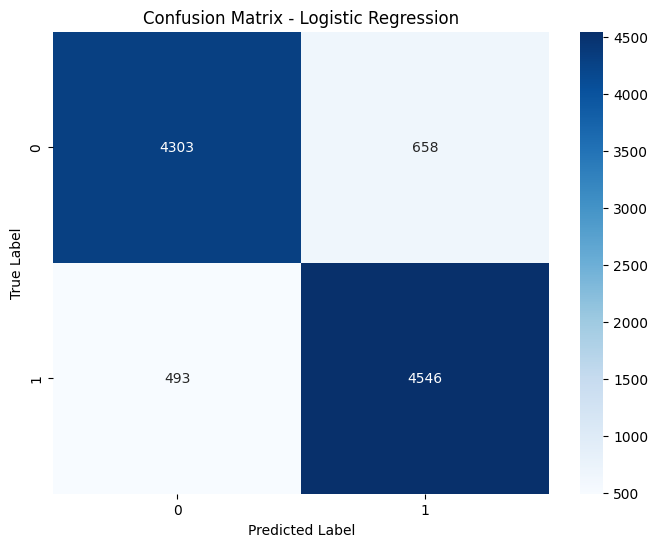

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generating and plotting the confusion matrix for the Logistic Regression model
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()